In [1]:
# Code credit: Saeed Abdul Rahim
# https://medium.com/@saeedAR/smote-and-near-miss-in-python-machine-learning-in-imbalanced-datasets-b7976d9a7a79
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, recall_score, \
                            classification_report, roc_auc_score, precision_score, \
                            f1_score
#from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('../data/csl/CSL_June/onepreg_norm.csv', usecols=list(range(1,253)))

In [3]:
print(df.shape)
df

(189916, 252)


,MomID,Sitenum,MomNearMiss,Momdeath,MomICU,Activeherpes,Alcohol,Anteabruption,Anteanemia,Anteasthma,...,vertex,vertex_new,Momage,Preweight,Admweight,Admtemp,AdmSBP,AdmDBP,AdmFHR,Birthweight1
0,41-00002,41,1,1,1,1,1,1,2,1,...,9,9,1.513764,1.304124,1.242846,1.152457,1.998093,0.853841,0.029027,-0.488526
1,41-00003,41,1,1,1,1,1,1,1,1,...,1,1,1.352260,-0.275241,-0.022888,0.246083,-1.444831,0.266498,0.029027,0.977089
2,41-00004,41,1,1,1,1,1,1,1,1,...,1,1,1.029253,1.455986,1.242846,-3.709006,-0.144171,-0.908188,0.029027,0.574889
3,41-00005,41,1,1,1,1,1,1,1,1,...,1,1,0.544742,-1.004179,-1.343653,-1.237076,1.079980,0.266498,0.029027,0.003766
4,41-00006,41,1,1,1,1,1,1,1,1,...,1,1,-1.070294,-0.275241,-0.298047,-0.770156,0.773942,2.322200,0.790118,0.861255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189911,52-07247,52,1,1,1,1,1,1,1,1,...,1,1,-1.393301,2.670600,2.123366,-0.001110,-0.067661,-0.027173,0.029027,1.861927
189912,52-07248,52,1,1,1,1,1,2,1,1,...,0,0,1.029253,-0.214497,2.040744,-0.001110,-0.067661,-0.027173,0.029027,-4.621526
189913,52-07249,52,2,1,2,1,1,2,1,1,...,9,9,0.060231,-0.639887,-1.398685,-0.001110,-0.067661,-0.027173,0.029027,-3.522717
189914,52-07250,52,1,1,1,1,1,1,1,1,...,1,1,-1.877812,-0.548822,-0.463152,-0.001110,-0.067661,-0.027173,0.029027,-1.001732


In [4]:
for col in df:
    if df[col].isna().any():
        print(col)

depression9
heart_disease9


In [5]:
X = df.iloc[:,5:]
X.drop('depression9', axis=1, inplace=True)
X.drop('heart_disease9', axis=1, inplace=True)
X.head()

,Activeherpes,Alcohol,Anteabruption,Anteanemia,Anteasthma,Antebleed3,AnteCHBP,Antechorio,Antefetaldth,Antefetdistress,...,vertex,vertex_new,Momage,Preweight,Admweight,Admtemp,AdmSBP,AdmDBP,AdmFHR,Birthweight1
0,1,1,1,2,1,1,1,1,1,1,...,9,9,1.513764,1.304124,1.242846,1.152457,1.998093,0.853841,0.029027,-0.488526
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1.352260,-0.275241,-0.022888,0.246083,-1.444831,0.266498,0.029027,0.977089
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1.029253,1.455986,1.242846,-3.709006,-0.144171,-0.908188,0.029027,0.574889
3,1,1,1,1,1,1,1,1,1,1,...,1,1,0.544742,-1.004179,-1.343653,-1.237076,1.079980,0.266498,0.029027,0.003766
4,1,1,1,1,1,1,1,1,1,1,...,1,1,-1.070294,-0.275241,-0.298047,-0.770156,0.773942,2.322200,0.790118,0.861255


In [6]:
y = df['MomNearMiss']
print(y.shape)
print(X.shape)

(189916,)
(189916, 245)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=7)
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [8]:
%%time
#lr = LogisticRegression(random_state=11) # 6.09s - ConvergenceWarning (using lbfgs)
#lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=11) # ConvWarning
#lr = LogisticRegression(solver='lbfgs', max_iter=4000, random_state=11) # 3min ConvWarning
#lr = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight='balanced', random_state=7) # 8 minutes wall - no warnings
#lr = LogisticRegression(solver='saga', max_iter=1000) # 1m 13s - ConvergenceWarning
lr = LogisticRegression(solver='liblinear') # 2.44s - No Warnings
lr.fit(X_train, y_train)

CPU times: user 50.2 s, sys: 782 ms, total: 51 s
Wall time: 51.2 s


LogisticRegression(solver='liblinear')

In [9]:
%%time
y_pred = lr.predict(X_test)

CPU times: user 95.9 ms, sys: 73.2 ms, total: 169 ms
Wall time: 117 ms


In [10]:
#print(f'lr.coeff_ = {lr.coef_}')

In [11]:
from sklearn.metrics import matthews_corrcoef
print(confusion_matrix(y_test, y_pred))
print(f'Accuracy = {accuracy_score(y_test, y_pred)}')
print(f'Balanced Accuracy = {balanced_accuracy_score(y_test, y_pred)}')
print(f'Recall = {recall_score(y_test, y_pred)}')
print(f'\nClassification Report:\n {classification_report(y_test, y_pred)}')
print(f'ROC_AUC = {roc_auc_score(y_test, y_pred)}')
print(f'MCC = {matthews_corrcoef(y_test, y_pred)}')

[[47241    13]
 [  207    18]]
Accuracy = 0.995366372501527
Balanced Accuracy = 0.5398624455072587
Recall = 0.9997248910145173

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     47254
           2       0.58      0.08      0.14       225

    accuracy                           1.00     47479
   macro avg       0.79      0.54      0.57     47479
weighted avg       0.99      1.00      0.99     47479

ROC_AUC = 0.5398624455072587
MCC = 0.21434565252142518


In [12]:
import sklearn
print(sklearn.__version__) # 0.22 required for plot_precision_recall_curve

0.23.2


In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

In [14]:
probs = lr.predict_proba(X_test)
probs = probs[:, 1]
precision, recall, _ = precision_recall_curve(y_test, probs, pos_label=2)

In [15]:
print(precision)

[0.005839   0.0058132  0.00581335 ... 0.5        1.         1.        ]


In [16]:
prec_s = precision_score(y_test, y_pred)
recall_s = recall_score(y_test, y_pred)
f1_s = f1_score(y_test, y_pred)
print(f'prec_s = {prec_s}')
print(f'recall_s = {recall_s}')
print(f'f1_s = {f1_s}')
prec_s_micro = precision_score(y_test, y_pred, average='micro')
recall_s_micro = recall_score(y_test, y_pred, average='micro')
f1_s_micro = f1_score(y_test, y_pred, average='micro')
print(f'prec_s_micro = {prec_s_micro}')
print(f'recall_s_micro = {recall_s_micro}')
print(f'f1_s_micro = {f1_s_micro}')
prec_s_macro = precision_score(y_test, y_pred, average='macro')
recall_s_macro = recall_score(y_test, y_pred, average='macro')
f1_s_macro = f1_score(y_test, y_pred, average='macro')
print(f'prec_s_macro = {prec_s_macro}')
print(f'recall_s_macro = {recall_s_macro}')
print(f'f1_s_macro = {f1_s_macro}')

prec_s = 0.9956373292867982
recall_s = 0.9997248910145173
f1_s = 0.9976769234018289
prec_s_micro = 0.995366372501527
recall_s_micro = 0.995366372501527
f1_s_micro = 0.995366372501527
prec_s_macro = 0.7881412452885603
recall_s_macro = 0.5398624455072587
f1_s_macro = 0.5691509617009145


In [17]:
from sklearn.metrics import average_precision_score
y_score = lr.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.98


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.98')

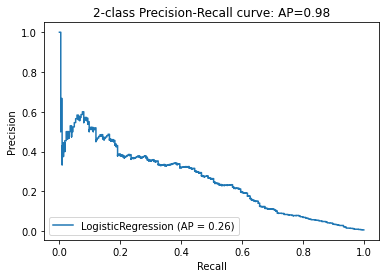

In [18]:
%matplotlib inline
disp = plot_precision_recall_curve(lr, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

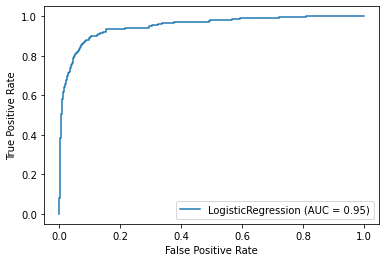

In [19]:
from sklearn.metrics import plot_roc_curve
roc = plot_roc_curve(lr, X_test, y_test)

In [20]:
print(np.bincount(y_test))
print(np.bincount(y_pred))

[    0 47254   225]
[    0 47448    31]


In [21]:
print(y_test)

37490     1
5112      1
105226    1
63190     1
62532     1
         ..
87522     1
56838     1
26978     1
41097     1
162671    1
Name: MomNearMiss, Length: 47479, dtype: int64


In [22]:
print(y_pred)

[1 1 1 ... 1 1 1]


In [23]:
probs = lr.predict_proba(X_test)

In [24]:
probs.shape


(47479, 2)

In [25]:
probs

array([[9.99400655e-01, 5.99344589e-04],
       [9.99179993e-01, 8.20007103e-04],
       [9.99427454e-01, 5.72546114e-04],
       ...,
       [9.98525259e-01, 1.47474112e-03],
       [9.99227977e-01, 7.72022708e-04],
       [9.99986326e-01, 1.36741180e-05]])

In [26]:
for i,j in probs:
    if i < 0.7:
        print('{0:0.4f}'.format(i),'{0:0.4f}'.format(j))

0.6890 0.3110
0.5361 0.4639
0.6552 0.3448
0.6876 0.3124
0.3994 0.6006
0.6954 0.3046
0.3336 0.6664
0.6961 0.3039
0.6715 0.3285
0.5236 0.4764
0.5471 0.4529
0.4341 0.5659
0.5483 0.4517
0.0312 0.9688
0.0604 0.9396
0.6242 0.3758
0.6748 0.3252
0.6843 0.3157
0.6459 0.3541
0.5757 0.4243
0.5754 0.4246
0.4593 0.5407
0.1473 0.8527
0.3669 0.6331
0.4408 0.5592
0.6439 0.3561
0.6616 0.3384
0.2339 0.7661
0.2709 0.7291
0.3713 0.6287
0.2831 0.7169
0.6329 0.3671
0.4120 0.5880
0.6122 0.3878
0.6609 0.3391
0.5393 0.4607
0.5964 0.4036
0.5035 0.4965
0.4538 0.5462
0.5562 0.4438
0.6872 0.3128
0.6783 0.3217
0.5752 0.4248
0.3964 0.6036
0.6357 0.3643
0.6957 0.3043
0.6942 0.3058
0.0577 0.9423
0.6565 0.3435
0.5708 0.4292
0.1936 0.8064
0.6131 0.3869
0.6322 0.3678
0.6789 0.3211
0.4496 0.5504
0.5850 0.4150
0.1047 0.8953
0.5951 0.4049
0.5969 0.4031
0.5393 0.4607
0.6188 0.3812
0.4077 0.5923
0.4855 0.5145
0.5178 0.4822
0.4463 0.5537
0.6723 0.3277
0.0405 0.9595
0.5073 0.4927
0.5513 0.4487
0.3994 0.6006
0.6581 0.3419
0.6225

In [27]:
proba = probs[:,1]
print(len(proba))
proba

47479


array([5.99344589e-04, 8.20007103e-04, 5.72546114e-04, ...,
       1.47474112e-03, 7.72022708e-04, 1.36741180e-05])

In [28]:
roc_auc = roc_auc_score(y_test, proba)
roc_auc2 = roc_auc_score(y_test, y_pred)
print(len(y_test))
print(roc_auc)
print(roc_auc2)

47479
0.9509813161025757
0.5398624455072587


In [29]:
from sklearn.metrics import roc_curve, plot_roc_curve
fpr, tpr, thresholds = roc_curve(y_test, proba, pos_label=2)
roc_auc = sklearn.metrics.auc(fpr, tpr)
roc_auc

0.9509813161025757

In [30]:
for i in thresholds:
    print('{0:0.4f}'.format(i))

1.9688
0.9688
0.9595
0.9459
0.8953
0.8527
0.8458
0.8064
0.7661
0.7200
0.7169
0.6664
0.6331
0.6036
0.6006
0.5592
0.5537
0.5504
0.5462
0.5145
0.4927
0.4764
0.4681
0.4639
0.4607
0.4531
0.4438
0.4277
0.4248
0.4246
0.4224
0.4150
0.3983
0.3812
0.3775
0.3758
0.3671
0.3655
0.3561
0.3435
0.3305
0.3285
0.3252
0.3238
0.3217
0.3211
0.3128
0.3124
0.3046
0.3043
0.2906
0.2897
0.2617
0.2606
0.2544
0.2492
0.2459
0.2436
0.2415
0.2409
0.2382
0.2301
0.2290
0.2285
0.2199
0.2177
0.2162
0.2121
0.2112
0.2069
0.2048
0.2046
0.2016
0.2015
0.2004
0.1976
0.1943
0.1938
0.1903
0.1901
0.1858
0.1855
0.1850
0.1846
0.1805
0.1794
0.1752
0.1750
0.1699
0.1688
0.1638
0.1631
0.1609
0.1600
0.1589
0.1573
0.1569
0.1567
0.1558
0.1556
0.1518
0.1511
0.1504
0.1493
0.1480
0.1478
0.1476
0.1469
0.1467
0.1458
0.1452
0.1442
0.1371
0.1355
0.1277
0.1276
0.1267
0.1262
0.1255
0.1247
0.1246
0.1244
0.1234
0.1232
0.1231
0.1228
0.1187
0.1183
0.1177
0.1176
0.1159
0.1158
0.1093
0.1085
0.1075
0.1068
0.1061
0.1053
0.1035
0.1035
0.1034
0.1034
0.0984

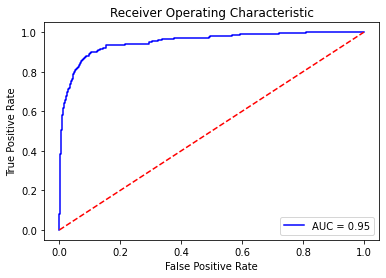

In [31]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
print(type(fpr))
print(fpr.shape, tpr.shape)

<class 'numpy.ndarray'>
(375,) (375,)


In [33]:
print(f'{type(precision)}; {type(recall)}')
print(f'{precision.shape}; {recall.shape}')

<class 'numpy.ndarray'>; <class 'numpy.ndarray'>
(38535,); (38535,)


In [34]:
np.savetxt('/tmp/fpr_tpr.dat', (fpr, tpr), delimiter=',')
np.savetxt('/tmp/prec_rec.dat', (precision, recall), delimiter=',')

In [35]:
f, t = np.loadtxt('/tmp/fpr_tpr.dat', delimiter=',')
p, r = np.loadtxt('/tmp/prec_rec.dat', delimiter=',')

In [36]:
print(np.all(f==fpr))
print(np.all(t==tpr))
print(np.all(p==precision))
print(np.all(r==recall))

True
True
True
True


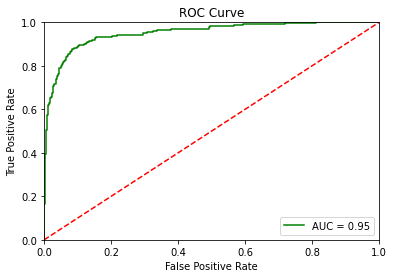

In [37]:
from sklearn.metrics import auc
roc_auc = auc(f, t)
plt.title('ROC Curve')
plt.plot(f, t, 'g', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

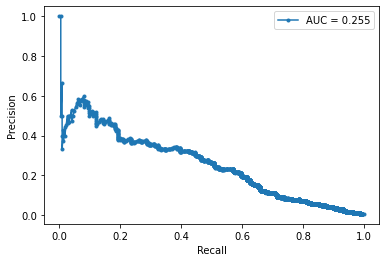

In [38]:
# calculate the no skill line as the proportion of the positive class
#no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
#plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pr_auc = auc(recall, precision)
plt.plot(r, p, marker='.', label='AUC = %0.3f' % pr_auc)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [39]:
len(y[y==1])

189018

In [40]:
len(y)

189916

In [43]:
f_rf, t_rf, ft_thresh = np.loadtxt('/MFMDatasets/MFM_bopf/src/multi_predict/RF/output/ft_test.dat', delimiter=',')
p_rf, r_rf, pr_thresh = np.loadtxt('/MFMDatasets/MFM_bopf/src/multi_predict/RF/output/pr_test.dat', delimiter=',')

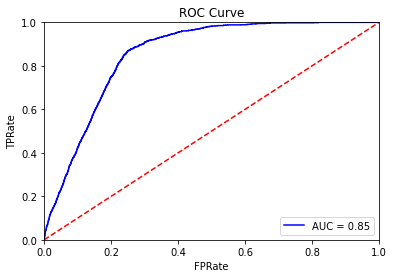

In [44]:
roc_auc_rf = auc(f_rf, t_rf)
plt.title('ROC Curve')
plt.plot(f_rf, t_rf, 'b', label = 'AUC = %0.2f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TPRate')
plt.xlabel('FPRate')
plt.show()

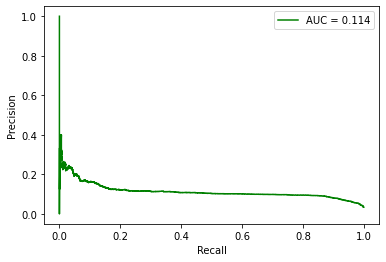

In [45]:
# calculate the no skill line as the proportion of the positive class
#no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
#plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pr_auc_rf = auc(r_rf, p_rf)
plt.plot(r_rf, p_rf, 'g', label='AUC = %0.3f' % pr_auc_rf)
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [46]:
def generate_specific_rows(filePath, row_indices=[]):
    with open(filePath) as f:
        
        # using enumerate to track line no.
        for i, line in enumerate(f):

            #if line no. is in the row index list, then return that line
            if i in row_indices:
 
               yield line

In [47]:
#pre_rec_gen = generate_specific_rows('/MFMDatasets/MFM_bopf/src/multi_predict/RF/output/stats_test.dat', [2,3])

In [48]:
nfpr, ntpr, nthresh = np.loadtxt('/MFMDatasets/MFM_bopf/src/multi_predict/RF/output/ft_test.dat', delimiter=',')
nprec, nrec, pr_thresh = np.loadtxt('/MFMDatasets/MFM_bopf/src/multi_predict/RF/output/pr_test.dat', delimiter=',')
ny_test, ny_pred = np.loadtxt('/MFMDatasets/MFM_bopf/src/multi_predict/RF/output/pred_test.dat', delimiter=',')
nprobs = np.loadtxt('/MFMDatasets/MFM_bopf/src/multi_predict/RF/output/probs_test.dat', delimiter=',')
nprob1 = nprobs[:,1]

In [49]:
nprec_s1 = precision_score(ny_test, ny_pred)
nprec_s2 = precision_score(ny_test, ny_pred, pos_label=2)
nprec_both = precision_score(ny_test, ny_pred, average=None)
print(f'1={nprec_both[0]}')
print(f'2={nprec_both[1]}')
nprec_s_micro = precision_score(ny_test, ny_pred, average='micro')
nprec_s_macro = precision_score(ny_test, ny_pred, average='macro')
nprec_s_weighted = precision_score(ny_test, ny_pred, average='weighted')
print(f'nprec_s1 = {nprec_s1}')
print(f'nprec_s2 = {nprec_s2}')
print(f'nprec_s_micro = {nprec_s_micro}')
print(f'nprec_s_macro = {nprec_s_macro}')
print(f'nprec_s_weigh = {nprec_s_weighted}')
nrecall_s1 = recall_score(ny_test, ny_pred)
nrecall_s2 = recall_score(ny_test, ny_pred, pos_label=2)
nrecall_s_micro = recall_score(ny_test, ny_pred, average='micro')
nrecall_s_macro = recall_score(ny_test, ny_pred, average='macro')
nrecall_s_weighted = recall_score(ny_test, ny_pred, average='weighted')
print(f'nrecall_s1 = {nrecall_s1}')
print(f'nrecall_s2 = {nrecall_s2}')
print(f'nrecall_s_micro = {nrecall_s_micro}')
print(f'nrecall_s_macro = {nrecall_s_macro}')
print(f'nrecall_s_weigh = {nrecall_s_weighted}')
nf1_s1 = f1_score(ny_test, ny_pred)
nf1_s2 = f1_score(ny_test, ny_pred, pos_label=2)
nf1_s_micro = f1_score(ny_test, ny_pred, average='micro')
nf1_s_macro = f1_score(ny_test, ny_pred, average='macro')
nf1_s_weighted = f1_score(ny_test, ny_pred, average='weighted')
print(f'nf1_s1 = {nf1_s1}')
print(f'nf1_s2 = {nf1_s2}')
print(f'nf1_s_micro = {nf1_s_micro}')
print(f'nf1_s_macro = {nf1_s_macro}')
print(f'nf1_s_weigh = {nf1_s_weighted}')

1=0.9950566882270481
2=0.09022254895408675
nprec_s1 = 0.9950566882270481
nprec_s2 = 0.09022254895408675
nprec_s_micro = 0.7516539623184237
nprec_s_macro = 0.5426396185905674
nprec_s_weigh = 0.9698266121805149
nrecall_s1 = 0.7482477391674218
nrecall_s2 = 0.8704061895551257
nrecall_s_micro = 0.7516539623184237
nrecall_s_macro = 0.8093269643612737
nrecall_s_weigh = 0.7516539623184237
nf1_s1 = 0.8541811809909854
nf1_s2 = 0.1634976383674458
nf1_s_micro = 0.7516539623184237
nf1_s_macro = 0.5088394096792156
nf1_s_weigh = 0.8349224046604607


In [50]:
from sklearn.metrics import fbeta_score
fbeta_05 = fbeta_score(ny_test, ny_pred, beta=0.5, pos_label=1)
print(f'fbeta_05 = {fbeta_05}')
fbeta_05 = fbeta_score(ny_test, ny_pred, beta=0.5, pos_label=2)
print(f'fbeta_05 = {fbeta_05}')
fbeta_2 = fbeta_score(ny_test, ny_pred, beta=2.0, pos_label=1)
print(f'fbeta_2 = {fbeta_2}')
fbeta_2 = fbeta_score(ny_test, ny_pred, beta=2.0, pos_label=2)
print(f'fbeta_2 = {fbeta_2}')
fbeta_1 = fbeta_score(ny_test, ny_pred, beta=1.0, pos_label=1)
print(f'fbeta_1 = {fbeta_1}')
fbeta_1 = fbeta_score(ny_test, ny_pred, beta=1.0, pos_label=2)
print(f'fbeta_1 = {fbeta_1}')

fbeta_05 = 0.9334754541637251
fbeta_05 = 0.10992948227285314
fbeta_2 = 0.7873035146505393
fbeta_2 = 0.31889261586431716
fbeta_1 = 0.8541811809909854
fbeta_1 = 0.1634976383674458


In [51]:
# roc_auc vs roc_auc_score
roc_auc_s_pred = roc_auc_score(ny_test, ny_pred)
roc_auc_s_prob = roc_auc_score(ny_test, nprob1)
roc_auc = auc(nfpr, ntpr)
print(f'roc_auc_s_pred = {roc_auc_s_pred}')
print(f'roc_auc_s_prob = {roc_auc_s_prob}')
print(f'roc_auc(auc) = {roc_auc}')

roc_auc_s_pred = 0.8093269643612737
roc_auc_s_prob = 0.8549350739799744
roc_auc(auc) = 0.8549350739799744


In [52]:
pr_auc = auc(nrec, nprec)
avg_prec = average_precision_score(ny_test, nprob1)
avg_prec_pred = average_precision_score(ny_test, ny_pred)
print(f'pr_auc = {pr_auc}')
print(f'avg_prec = {avg_prec}')
print(f'avg_prec_pred = {avg_prec_pred}')

pr_auc = 0.11361188760283794
avg_prec = 0.9356989233096057
avg_prec_pred = 0.9564223932359934


In [53]:
pr_thresh.shape

(45216,)